In [ ]:
!pip install -Uqq fastai


In [ ]:
from fastai.vision.all import *


In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"t35t1y","key":"b5ad0622b739b47130064fe981a1bea3"}'}

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/



In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vbookshelf/rice-leaf-diseases

 57% 21.0M/36.7M [00:00<00:00, 211MB/s]
100% 36.7M/36.7M [00:00<00:00, 241MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "rice-leaf-diseases.zip"

In [ ]:
with ZipFile(file_name,'r') as zip: #ZIP HALINDE GELENIN DOSYAYI AC
  zip.extractall()

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 719 kB 5.0 MB/s 
     |████████████████████████████████| 441 kB 44.9 MB/s 
     |████████████████████████████████| 1.3 MB 39.0 MB/s 
     |████████████████████████████████| 5.5 MB 31.3 MB/s 
     |████████████████████████████████| 1.6 MB 47.0 MB/s 
     |████████████████████████████████| 212 kB 51.7 MB/s 
     |████████████████████████████████| 163 kB 47.5 MB/s 
     |████████████████████████████████| 95 kB 5.1 MB/s 
     |████████████████████████████████| 115 kB 47.3 MB/s 
     |████████████████████████████████| 127 kB 47.2 MB/s 
     |████████████████████████████████| 115 kB 29.7 MB/s 
     |████████████████████████████████| 7.6 MB 41.4 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *


In [ ]:
path=Path("/content/rice_leaf_diseases")
path.ls()

(#3) [Path('/content/rice_leaf_diseases/Bacterial leaf blight'),Path('/content/rice_leaf_diseases/Brown spot'),Path('/content/rice_leaf_diseases/Leaf smut')]

In [ ]:
item_tfms = Resize(128)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:
brain = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2, seed=42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [ ]:
dls = brain.dataloaders(path,bs=32)


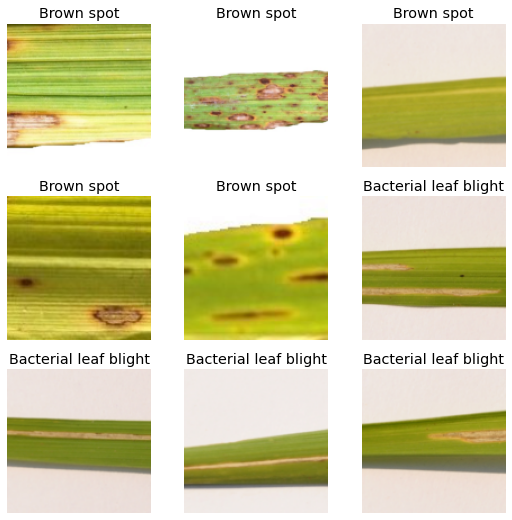

In [ ]:
dls.show_batch(max_n=9,unique=False)

In [ ]:
learn= cnn_learner(dls,vgg16_bn, pretrained=True, metrics=[accuracy,error_rate])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64

  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
learn.lr_find()